A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [5]:
path_to_zips = '../data/us_dot/otp/'

In [6]:
! ls {path_to_zips} 

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip	On_Time_On_Time_Performance_2015_8.zip


For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [7]:
! unzip -l {path_to_zips}On_Time_On_Time_Performance_2015_1.zip

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
211633432  2015-04-16 20:02   On_Time_On_Time_Performance_2015_1.csv
    12054  2015-04-16 20:02   readme.html
---------                     -------
211645486                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [8]:
! unzip -o {path_to_zips}On_Time_On_Time_Performance_2015_1.zip readme.html -d $(pwd)

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  inflating: /home/dani/repos/master-data-science/06_python_for_data_science/readme.html  


### Take a look at the beginning of the readme file

using the shell

In [9]:
! head readme.html 

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [10]:
from IPython.display import IFrame
IFrame('readme.html', width=700, height=350)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [11]:
# have a look at the beginning of one of the files to see what they look like

! unzip -p {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 2

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

In [12]:
import os
import zipfile

filenames = os.listdir(path_to_zips)

zip_file = zipfile.ZipFile(path_to_zips + filenames[0])

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [13]:
csv, readme = zip_file.filelist

csv_file = zip_file.open(csv.filename)

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [14]:
# We reopen the file because we have already consumed the header line.
import pandas as pd

csv_file = zip_file.open(csv.filename)
df = pd.read_csv(csv_file)

csv_file.close()
zip_file.close()

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [15]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,3,8,2,7,2015-08-02,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,3,1,2015-08-03,AA,19805,AA,N784AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,4,2,2015-08-04,AA,19805,AA,N793AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,5,3,2015-08-05,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,6,4,2015-08-06,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(510536, 110)

In [17]:
print(df.size)
df.size == df.shape[0] * df.shape[1]

56158960


True

In [18]:
df.dtypes

Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate             object
UniqueCarrier          object
AirlineID               int64
Carrier                object
TailNum                object
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                 object
OriginCityName         object
OriginState            object
OriginStateFips         int64
OriginStateName        object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                   object
DestCityName           object
DestState              object
DestStateFips           int64
DestStateName          object
DestWac                 int64
CRSDepTime              int64
                       ...   
Div2WheelsOn          float64
Div2TotalGTime        float64
Div2Longes

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [19]:
non_null_counts = df.count()

non_null_counts[non_null_counts < 1000]

Div2Airport         10
Div2AirportID       10
Div2AirportSeqID    10
Div2WheelsOn        10
Div2TotalGTime      10
Div2LongestGTime    10
Div2WheelsOff        3
Div2TailNum          3
Div3Airport          0
Div3AirportID        0
Div3AirportSeqID     0
Div3WheelsOn         0
Div3TotalGTime       0
Div3LongestGTime     0
Div3WheelsOff        0
Div3TailNum          0
Div4Airport          0
Div4AirportID        0
Div4AirportSeqID     0
Div4WheelsOn         0
Div4TotalGTime       0
Div4LongestGTime     0
Div4WheelsOff        0
Div4TailNum          0
Div5Airport          0
Div5AirportID        0
Div5AirportSeqID     0
Div5WheelsOn         0
Div5TotalGTime       0
Div5LongestGTime     0
Div5WheelsOff        0
Div5TailNum          0
Unnamed: 109         0
dtype: int64

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [20]:
# Dropping inplace leads to confusion. Confusion leads to fear. 
# Fear leads to anger. Anger leads to hate. Hate leads to suffering.
df2 = df.drop(df.columns[non_null_counts < 1000], axis=1)

In [21]:
df2.shape

(510536, 77)

In [22]:
# Another way to do it

df.dropna(axis=1, thresh=1000).shape == df2.shape

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [23]:
df[df.columns[df.columns.str.contains('Origin')]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
17875,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91
149348,10821,1082103,30852,BWI,"Baltimore, MD",MD,24,Maryland,35
25620,11109,1110902,30189,COS,"Colorado Springs, CO",CO,8,Colorado,82
94143,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33
71144,11278,1127803,30852,DCA,"Washington, DC",VA,51,Virginia,38


So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [24]:
df2 = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
34755,2015,3,8,7,5,2015-08-07,AA,19805,AA,N4YEAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183458,2015,3,8,12,3,2015-08-12,WN,19393,WN,N958WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470693,2015,3,8,24,1,2015-08-24,EV,20366,EV,N12540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248612,2015,3,8,30,7,2015-08-30,WN,19393,WN,N275WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169771,2015,3,8,8,6,2015-08-08,WN,19393,WN,N420WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [25]:
df2.dtypes

FlightDate          object
DayOfWeek            int64
Carrier             object
TailNum             object
FlightNum            int64
Origin              object
OriginCityName      object
OriginStateName     object
Dest                object
DestCityName        object
DestStateName       object
DepTime            float64
DepDelay           float64
AirTime            float64
Distance           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [26]:
# We'll need to take an int and return a string of the appropriate format

def deptime_to_string(num):
    
    hour = int(num / 100) % 24 # There are 24s in the data, which datetime doesn't like
    minute = int(num % 100)
    

    return '%02d:%02d' % (hour, minute)

deptime_to_string(2423.0)

'00:23'

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

In [27]:
series = df2['DepTime'].dropna().apply(deptime_to_string)

df2['DepTimeStr'] = series

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# What happened to the nas? They are still nas, because our 
# Series didn't contain them. Therefore, when we put the 
# Series back into the Dataframe, those cells stayed empty.

df2['DepTimeStr'].count()

505817

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [29]:
# This is the format pd.to_datetime needs:

ts = pd.to_datetime('2015-01-15 08:30')
ts

Timestamp('2015-01-15 08:30:00')

In [30]:
departure_datetimes = pd.to_datetime(df2['FlightDate'] + ' ' + df2['DepTimeStr'])
df2['DepDateTime'] = departure_datetimes

# Drop the now-redundant columns
df2 = df2.drop(['FlightDate', 'DepTime', 'DepTimeStr'], axis=1)

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df2.sample(5)

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
135524,4,UA,N37434,1907,DEN,"Denver, CO",Colorado,BOS,"Boston, MA",Massachusetts,-1.0,200.0,1754.0,2015-08-06 10:03:00
223797,1,WN,N903WN,2318,MDW,"Chicago, IL",Illinois,SDF,"Louisville, KY",Kentucky,-4.0,42.0,271.0,2015-08-24 07:21:00
234928,4,WN,N420WN,1683,BUR,"Burbank, CA",California,SMF,"Sacramento, CA",California,-4.0,55.0,358.0,2015-08-27 10:16:00
126024,4,DL,N302DQ,95,BNA,"Nashville, TN",Tennessee,ATL,"Atlanta, GA",Georgia,20.0,39.0,214.0,2015-08-06 09:35:00
484776,1,EV,N852AS,5039,CAK,"Akron, OH",Ohio,DTW,"Detroit, MI",Michigan,-6.0,36.0,133.0,2015-08-24 19:34:00


### Inspect the types, see if everything is in order

In [32]:
df2.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [33]:
df2.sort_values(by='DepDelay', ascending=False).head()

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
4106,6,AA,N479AA,96,RIC,"Richmond, VA",Virginia,DFW,"Dallas/Fort Worth, TX",Texas,1878.0,156.0,1158.0,2015-08-01 14:27:00
7165,7,AA,N5ERAA,270,HNL,"Honolulu, HI",Hawaii,LAX,"Los Angeles, CA",California,1515.0,299.0,2556.0,2015-08-23 08:25:00
19225,6,AA,N503AA,1291,MKE,"Milwaukee, WI",Wisconsin,DFW,"Dallas/Fort Worth, TX",Texas,1402.0,108.0,853.0,2015-08-01 06:27:00
33642,1,AA,N469AA,2263,CMH,"Columbus, OH",Ohio,DFW,"Dallas/Fort Worth, TX",Texas,1259.0,125.0,926.0,2015-08-10 08:24:00
7028,1,AA,N5DHAA,266,LIH,"Lihue, HI",Hawaii,LAX,"Los Angeles, CA",California,1235.0,292.0,2615.0,2015-08-10 10:33:00


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [34]:
df2['DepDelay'].describe()

count    505817.000000
mean          9.932045
std          36.920822
min         -42.000000
25%          -5.000000
50%          -1.000000
75%           8.000000
max        1878.000000
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [35]:
df2.corr()

,DayOfWeek,FlightNum,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.018226,-0.014803,0.011359,0.016482
FlightNum,0.018226,1.000000,-0.024343,-0.313282,-0.321260
DepDelay,-0.014803,-0.024343,1.000000,0.024412,0.025826
AirTime,0.011359,-0.313282,0.024412,1.000000,0.991452
Distance,0.016482,-0.321260,0.025826,0.991452,1.000000


#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [36]:
grouped_by_plane = df2.groupby('TailNum')
type(grouped_by_plane)

pandas.core.groupby.groupby.DataFrameGroupBy

In [37]:
grouped_by_plane['DepDelay'].mean().sort_values(ascending=False).head(10)

TailNum
N37018    293.000000
N218UA    270.000000
N283AY    208.000000
N795UA    193.000000
N7AEAA    191.666667
N182DN    187.500000
N793UA    136.750000
N7AHAA    115.250000
N7BPAA     98.500000
N7BXAA     92.800000
Name: DepDelay, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [38]:
delays_by_plane = grouped_by_plane['DepDelay'].agg(['mean', 'count'])

In [39]:
delays_by_plane.sort_values('mean', ascending=False)

,mean,count
TailNum,,
N37018,293.000000,2
N218UA,270.000000,1
N283AY,208.000000,2
N795UA,193.000000,1
N7AEAA,191.666667,3
N182DN,187.500000,2
N793UA,136.750000,4
N7AHAA,115.250000,4
N7BPAA,98.500000,2


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [40]:
consistently_delayed = delays_by_plane[delays_by_plane['count'] > 14]
highly_delayed = consistently_delayed.sort_values('mean', ascending=False).head(100)

# What companies do those planes belong to?
df2.join(highly_delayed, on='TailNum', how='inner')['Carrier'].unique()

array(['AA', 'B6', 'DL', 'UA', 'OO', 'WN', 'F9', 'HA', 'NK', 'EV'],
      dtype=object)

#### Exercise: 

Show cities by descending number of airports

In [41]:
airports_by_city = df2.groupby('OriginCityName')['Origin'].unique()

airports_by_city.map(lambda x: len(x)).sort_values(ascending=False).head()

OriginCityName
Houston, TX         2
Chicago, IL         2
New York, NY        2
Washington, DC      2
Fayetteville, AR    1
Name: Origin, dtype: int64

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

(-10, 240)

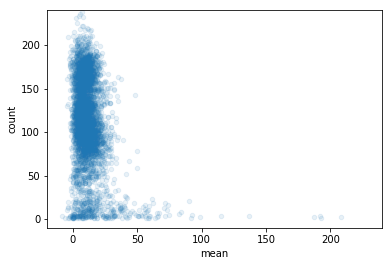

In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline

ax = delays_by_plane.plot.scatter('mean', 'count', alpha=.1)
ax.set_xlim(-20,240)
ax.set_ylim(-10,240)

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

(-10, 240)

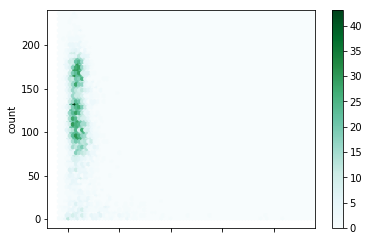

In [43]:
ax = delays_by_plane.plot.hexbin('mean', 'count')
ax.set_xlim(-20,240)
ax.set_ylim(-10,240)

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

Text(0.5,1,'Number of flights per delay bin')

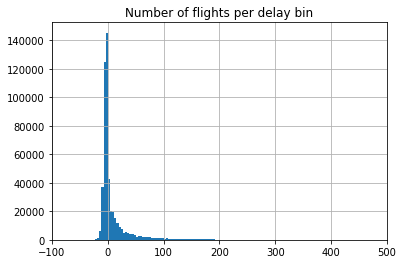

In [44]:
# Little trick: Just by importing seaborn, it will change 
# matplotlib defaults and make your graphs much prettier.

import seaborn as sns

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)

plt.title('Number of flights per delay bin')

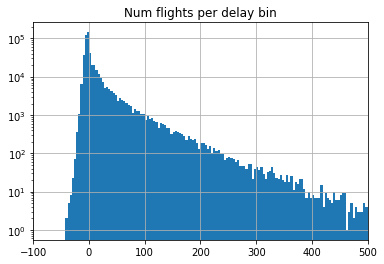

In [45]:
# We can make any axis logarithmic in order to see better a very unequal distribution

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)
plt.title('Num flights per delay bin')

plt.yscale('log')


### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [46]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [47]:
# Now, we can iterate over the groups and extract the delays. 
# We keep them in two different vectors because that is what boxplot wants

df2['DepHour'] =  df2['DepDateTime'].map(lambda x: x.hour)

by_hour = df2.groupby('DepHour')

hours = []
groups = []

for h, g in by_hour:
    hours.append("%02d" % h)
    groups.append(g['DepDelay'])

In [48]:
# We have create a groupby object. That object behaves like a list.
# Each element of that list is a (key, dataframe) tuple.
# You can think of the key as the group's name. The dataframe
# contains all the rows in the original dataframe that correspond 
# to that key: Here, group '0.0' contains all rows from flights 
# that departed on hour 0.

print(type(by_hour))
print(list(by_hour))
print(list(by_hour)[0], list(by_hour)[0][1].shape)

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
[(0.0,         DayOfWeek Carrier TailNum  FlightNum Origin         OriginCityName  \
609             5      AA  N3CSAA         23    LAS          Las Vegas, NV   
845             5      AA  N789AA         30    LAX        Los Angeles, CA   
858             4      AA  N790AA         30    LAX        Los Angeles, CA   
861             1      AA  N790AA         30    LAX        Los Angeles, CA   
969             4      AA  N3CVAA         35    ORD            Chicago, IL   
3846            5      AA  N858AA         88    DFW  Dallas/Fort Worth, TX   
3930            7      AA  N505AA         91    ORD            Chicago, IL   
3937            1      AA  N570AA         91    ORD            Chicago, IL   
6183            6      AA  N3BPAA        260    LAX        Los Angeles, CA   
6184            7      AA  N3BGAA        260    LAX        Los Angeles, CA   
6185            1      AA  N3JAAA        260    LAX        Los Angeles, CA   
61

(0.0,         DayOfWeek Carrier TailNum  FlightNum Origin         OriginCityName  \
609             5      AA  N3CSAA         23    LAS          Las Vegas, NV   
845             5      AA  N789AA         30    LAX        Los Angeles, CA   
858             4      AA  N790AA         30    LAX        Los Angeles, CA   
861             1      AA  N790AA         30    LAX        Los Angeles, CA   
969             4      AA  N3CVAA         35    ORD            Chicago, IL   
3846            5      AA  N858AA         88    DFW  Dallas/Fort Worth, TX   
3930            7      AA  N505AA         91    ORD            Chicago, IL   
3937            1      AA  N570AA         91    ORD            Chicago, IL   
6183            6      AA  N3BPAA        260    LAX        Los Angeles, CA   
6184            7      AA  N3BGAA        260    LAX        Los Angeles, CA   
6185            1      AA  N3JAAA        260    LAX        Los Angeles, CA   
6186            2      AA  N3MLAA        260    LAX       

### Everything looks ok! let's plot this thing!

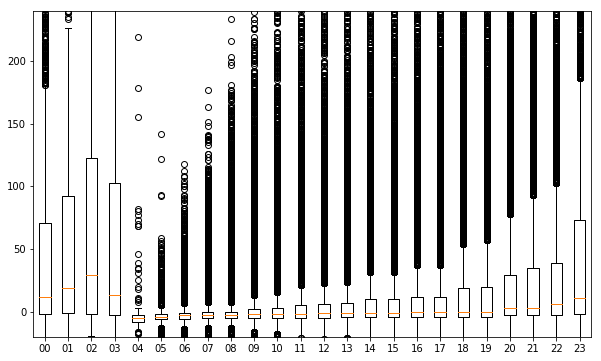

In [49]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_ylim(-20, 240)

bp = plt.boxplot(groups)

labels = plt.setp(ax1, xticklabels=hours)